In [5]:
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display
import soundfile as sf # librosa fails when reading files on Kaggle.

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [6]:
audio_path = 'C:\\MusicaDataset\\audio\\UNIDO\\207216-2-0-66.wav'
ipd.Audio(audio_path)

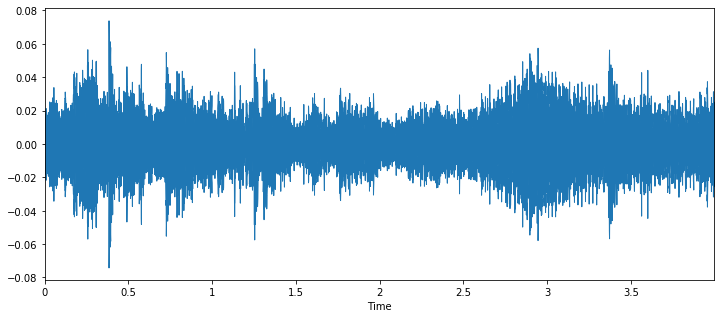

In [8]:
x, sr = librosa.load(audio_path)

# Plot the sample.
plt.figure(figsize=(12, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

Number of crosses: 7


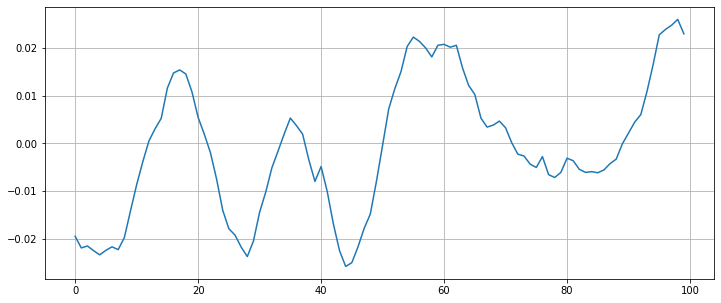

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(x[1000:1100]) # Zoom-in for seeing the example.
plt.grid()

n_crossings = librosa.zero_crossings(x[1000:1100], pad=False)
print(f'Number of crosses: {sum(n_crossings)}')

In [10]:
centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

print(f'Centroids Shape: {centroids.shape}')
print(f'First 3 centroids: {centroids[:3]}')

Centroids Shape: (173,)
First 3 centroids: [1738.02991211 1811.84630164 2047.15408381]


MFFCs shape: (20, 173)
First mffcs: [-348.6649  -334.45044 -318.8171  -304.0941  -302.756  ]


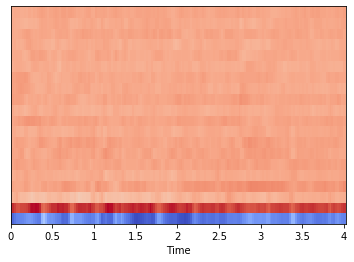

In [11]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(f'MFFCs shape: {mfccs.shape}')
print(f'First mffcs: {mfccs[0, :5]}')

# We can even display an spectogram of the mfccs.
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

In [12]:
def mean_mfccs(x):
    return [np.mean(feature) for feature in librosa.feature.mfcc(x)]

def parse_audio(x):
    return x.flatten('F')[:x.shape[0]] 

def get_audios():
    train_path = "C:\\MusicaDataset\\audio\\UNIDO\\"
    train_file_names = os.listdir(train_path)
    train_file_names.sort()
    
    samples = []
    i=0
    for file_name in train_file_names:
        x, sr = sf.read(train_path + file_name, always_2d=True)
        x = parse_audio(x)
        samples.append(mean_mfccs(x))
        print(i+1)
        i=i+1
    return np.array(samples)

def get_samples():
    df = pd.read_csv('C:\\MusicaDataset\\audio\\UrbanSound.csv')
    return get_audios(), df['class'].values

In [13]:
X, Y = get_samples()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065


3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708


5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352


6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994


8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [16]:
print(f'Shape: {x_train.shape}')
print(f'Observation: \n{x_train[0]}')
print(f'Labels: {y_train[:5]}')

Shape: (6549, 20)
Observation: 
[-133.78652576  220.45384897  -94.77547662   43.12803549  -20.27181359
   -1.66412059    0.89154694   -3.67757866  -16.06212657   10.05476865
   -5.77236633  -12.82914888    9.05922776  -15.12540816   -2.12827302
    3.68452383   -0.90611664  -13.23115209   14.97998155   -3.32911351]
Labels: ['drilling' 'car_horn' 'dog_bark' 'siren' 'air_conditioner']


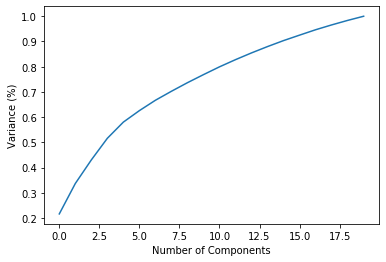

In [17]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

pca = PCA().fit(x_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

In [18]:
#KNeighborsClassifier(n_neighbors, weights, algorithm='auto', metric='minkowski')

from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = [{
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
       KNeighborsClassifier(), tuned_parameters, cv=5, n_jobs=-1,scoring='%s_macro' % score
    )
    clf.fit(x_train_scaled, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test_scaled)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.







# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

Grid scores on development set:

0.888 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.910 (+/-0.012) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.861 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.893 (+/-0.015) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.829 (+/-0.005) for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.877 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.810 (+/-0.017) for {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.864 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.792 (+/-0.015) for {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.853 (+/-0.022) for {'metric': 'euclidean'

In [19]:
model = KNeighborsClassifier(3, weights= 'uniform', metric='euclidean')
model.fit(x_train_scaled, y_train)


print(f'Model Score: {model.score(x_test_scaled, y_test)}')

y_predict = model.predict(x_test_scaled)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_test)}')

Model Score: 0.9005955107650023
Confusion Matrix: 
[[235   5   1   6   0   3   3   0   2   8]
 [  0  75   0   2   2   0   1   0   0   0]
 [  1   8 227  25   5   2   4   2   4  12]
 [  0   3   5 181   1   0   2   0   6   4]
 [  0   1   0   3 227   3   0   3   0   0]
 [  1   1   1   2   0 262   0   0   2   1]
 [  0   2   4  18   1   0  93   0   0   0]
 [  0   5   1   1   6   0   0 227   0   2]
 [  0   1   1   8   1   0   0   0 226   0]
 [  1   8  10   8   1   0   0   0   3 213]]


In [31]:
from functools import cmp_to_key
from graphviz import Digraph
from scipy import spatial
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

import os
import math
import csv
import librosa
import librosa.display

def euclidean_dist(a, b):
    return np.linalg.norm(a - b)


def cosine_similarity(a, b):
    return 1 - spatial.distance.cosine(a, b)


def evaluate_knn(knn, xtest, ytest, K=3, distance=euclidean_dist):
    good = 0
    ii=0
    for i in range(len(xtest)):
        ii=ii+1
        print('Paso '+str(i))
        neighbours = [i['data'].label for i in knn_music.run(
            xtest[i], K, distance=distance)]
        prediction = max(set(neighbours), key=neighbours.count)
        if prediction == ytest[i]:
            good += 1
    return good / len(ytest)


class KDNode:

    def __init__(self, point, axis, label):
        self.point = point
        self.label = label
        self.left = None
        self.right = None
        self.axis = axis


class KDTree:

    def __init__(self, K: int, points=np.array([], dtype=float), labels=np.array([])):
        self.K = K
        self.root = self.build(points, labels)

    def build(self, points, labels, depth: int = 0):
        if len(points) == 0:
            return None
        axis: int = depth % self.K
        ind = points[:, axis].argsort()
        points = points[ind]
        labels = labels[ind]
        median = len(points)//2
        node = KDNode(points[median], axis, labels[median])
        node.left = self.build(points[0:median], labels[0:median], depth+1)
        node.right = self.build(
            points[median+1:len(points)], labels[median+1:len(points)], depth+1)
        return node

    def insert(self, kdnode, new_kdnode, depth=0):
        axis = kdnode.axis
        new_kdnode.axis = axis
        if new_kdnode.point[axis] < kdnode.point[axis]:
            if kdnode.left == None:
                new_kdnode.axis = (depth+1) % self.K
                kdnode.left = new_kdnode
            else:
                self.insert(kdnode.left, new_kdnode, depth+1)
        else:
            if kdnode.right == None:
                new_kdnode.axis = (depth+1) % self.K
                kdnode.right = new_kdnode
            else:
                self.insert(kdnode.right, new_kdnode, depth+1)

    def parse(self, a):
        edge = 'P = '+',\n'.join(map(str, a.point))
        edge += '\nL = ' + str(a.label)
        return edge

    def get_dot(self, root):
        # min height 1
        dot = Digraph('KDTREE', filename='unix.gv',
                      node_attr={'color': 'lightblue2', 'style': 'filled'})
        queue = [(root, root.left), (root, root.right)]
        while len(queue) > 0:
            parent, node = queue.pop(0)
            dot.edge(self.parse(parent), self.parse(node))
            if node.left:
                queue.append((node, node.left))
            if node.right:
                queue.append((node, node.right))
        return dot


class KNN:
    def __init__(self, dimension, vectors=np.array([], dtype=float), labels=np.array([])):
        self.dimension = dimension
        self.tree = KDTree(dimension, vectors, labels)

    def insert(self, vec, label):
        if self.tree.root == None:
            self.tree.root = KDNode(np.array(vec), 0, label)
            return
        self.tree.insert(self.tree.root, KDNode(np.array(vec), 0, label))

    def get_dot(self):
        return self.tree.get_dot(self.tree.root)

    def run(self, query_point, k_neighbours, distance=euclidean_dist):
        size = k_neighbours
        queue = []

        def insert_neighbor(val, priority):
            if len(queue) < size:
                queue.append({'data': val, 'priority': priority})
            else:  # full
                if queue[len(queue)-1]['priority'] > priority:
                    queue[len(queue) - 1] = {'data': val, 'priority': priority}
                queue.sort(key=cmp_to_key(
                    lambda a, b: a['priority'] - b['priority']))

        def run_knn(node, query_point, depth=0):
            if node == None:
                return
            insert_neighbor(node, distance(node.point, query_point))
            axis = depth % self.tree.K
            next_branch = None
            opposite_branch = None
            if query_point[axis] < node.point[axis]:
                next_branch = node.left
                opposite_branch = node.right
            else:
                next_branch = node.right
                opposite_branch = node.left

            run_knn(next_branch, query_point, depth + 1)
            if len(queue) < size or abs(query_point[axis] - node.point[axis]) < queue[len(queue) - 1]['priority']:
                run_knn(opposite_branch, query_point, depth + 1)

        run_knn(self.tree.root, query_point)
        return queue

In [32]:

knn_music = KNN(len(x_train_scaled[0]), x_train_scaled, y_train)


In [37]:
accuracy = evaluate_knn(knn_music, x_test_scaled, y_test,K=3, distance=euclidean_dist)

Paso 0
Paso 1
Paso 2
Paso 3
Paso 4
Paso 5
Paso 6
Paso 7
Paso 8
Paso 9
Paso 10
Paso 11
Paso 12
Paso 13
Paso 14
Paso 15
Paso 16
Paso 17
Paso 18
Paso 19
Paso 20
Paso 21
Paso 22
Paso 23
Paso 24
Paso 25
Paso 26
Paso 27
Paso 28
Paso 29
Paso 30
Paso 31
Paso 32
Paso 33
Paso 34
Paso 35
Paso 36
Paso 37
Paso 38
Paso 39
Paso 40
Paso 41
Paso 42
Paso 43
Paso 44
Paso 45
Paso 46
Paso 47
Paso 48
Paso 49
Paso 50
Paso 51
Paso 52
Paso 53
Paso 54
Paso 55
Paso 56
Paso 57
Paso 58
Paso 59
Paso 60
Paso 61
Paso 62
Paso 63
Paso 64
Paso 65
Paso 66
Paso 67
Paso 68
Paso 69
Paso 70
Paso 71
Paso 72
Paso 73
Paso 74
Paso 75
Paso 76
Paso 77
Paso 78
Paso 79
Paso 80
Paso 81
Paso 82
Paso 83
Paso 84
Paso 85
Paso 86
Paso 87
Paso 88
Paso 89
Paso 90
Paso 91
Paso 92
Paso 93
Paso 94
Paso 95
Paso 96
Paso 97
Paso 98
Paso 99
Paso 100
Paso 101
Paso 102
Paso 103
Paso 104
Paso 105
Paso 106
Paso 107
Paso 108
Paso 109
Paso 110
Paso 111
Paso 112
Paso 113
Paso 114
Paso 115
Paso 116
Paso 117
Paso 118
Paso 119
Paso 120
Paso 121
Paso 122
Pas

Paso 922
Paso 923
Paso 924
Paso 925
Paso 926
Paso 927
Paso 928
Paso 929
Paso 930
Paso 931
Paso 932
Paso 933
Paso 934
Paso 935
Paso 936
Paso 937
Paso 938
Paso 939
Paso 940
Paso 941
Paso 942
Paso 943
Paso 944
Paso 945
Paso 946
Paso 947
Paso 948
Paso 949
Paso 950
Paso 951
Paso 952
Paso 953
Paso 954
Paso 955
Paso 956
Paso 957
Paso 958
Paso 959
Paso 960
Paso 961
Paso 962
Paso 963
Paso 964
Paso 965
Paso 966
Paso 967
Paso 968
Paso 969
Paso 970
Paso 971
Paso 972
Paso 973
Paso 974
Paso 975
Paso 976
Paso 977
Paso 978
Paso 979
Paso 980
Paso 981
Paso 982
Paso 983
Paso 984
Paso 985
Paso 986
Paso 987
Paso 988
Paso 989
Paso 990
Paso 991
Paso 992
Paso 993
Paso 994
Paso 995
Paso 996
Paso 997
Paso 998
Paso 999
Paso 1000
Paso 1001
Paso 1002
Paso 1003
Paso 1004
Paso 1005
Paso 1006
Paso 1007
Paso 1008
Paso 1009
Paso 1010
Paso 1011
Paso 1012
Paso 1013
Paso 1014
Paso 1015
Paso 1016
Paso 1017
Paso 1018
Paso 1019
Paso 1020
Paso 1021
Paso 1022
Paso 1023
Paso 1024
Paso 1025
Paso 1026
Paso 1027
Paso 1028
Paso 102

Paso 1752
Paso 1753
Paso 1754
Paso 1755
Paso 1756
Paso 1757
Paso 1758
Paso 1759
Paso 1760
Paso 1761
Paso 1762
Paso 1763
Paso 1764
Paso 1765
Paso 1766
Paso 1767
Paso 1768
Paso 1769
Paso 1770
Paso 1771
Paso 1772
Paso 1773
Paso 1774
Paso 1775
Paso 1776
Paso 1777
Paso 1778
Paso 1779
Paso 1780
Paso 1781
Paso 1782
Paso 1783
Paso 1784
Paso 1785
Paso 1786
Paso 1787
Paso 1788
Paso 1789
Paso 1790
Paso 1791
Paso 1792
Paso 1793
Paso 1794
Paso 1795
Paso 1796
Paso 1797
Paso 1798
Paso 1799
Paso 1800
Paso 1801
Paso 1802
Paso 1803
Paso 1804
Paso 1805
Paso 1806
Paso 1807
Paso 1808
Paso 1809
Paso 1810
Paso 1811
Paso 1812
Paso 1813
Paso 1814
Paso 1815
Paso 1816
Paso 1817
Paso 1818
Paso 1819
Paso 1820
Paso 1821
Paso 1822
Paso 1823
Paso 1824
Paso 1825
Paso 1826
Paso 1827
Paso 1828
Paso 1829
Paso 1830
Paso 1831
Paso 1832
Paso 1833
Paso 1834
Paso 1835
Paso 1836
Paso 1837
Paso 1838
Paso 1839
Paso 1840
Paso 1841
Paso 1842
Paso 1843
Paso 1844
Paso 1845
Paso 1846
Paso 1847
Paso 1848
Paso 1849
Paso 1850
Paso 1851


In [38]:
accuracy_cos = evaluate_knn(knn_music, x_test_scaled, y_test,K=3, distance=cosine_similarity)

Paso 0
Paso 1
Paso 2
Paso 3
Paso 4
Paso 5
Paso 6
Paso 7
Paso 8
Paso 9
Paso 10
Paso 11
Paso 12
Paso 13
Paso 14
Paso 15
Paso 16
Paso 17
Paso 18
Paso 19
Paso 20
Paso 21
Paso 22
Paso 23
Paso 24
Paso 25
Paso 26
Paso 27
Paso 28
Paso 29
Paso 30
Paso 31
Paso 32
Paso 33
Paso 34
Paso 35
Paso 36
Paso 37
Paso 38
Paso 39
Paso 40
Paso 41
Paso 42
Paso 43
Paso 44
Paso 45
Paso 46
Paso 47
Paso 48
Paso 49
Paso 50
Paso 51
Paso 52
Paso 53
Paso 54
Paso 55
Paso 56
Paso 57
Paso 58
Paso 59
Paso 60
Paso 61
Paso 62
Paso 63
Paso 64
Paso 65
Paso 66
Paso 67
Paso 68
Paso 69
Paso 70
Paso 71
Paso 72
Paso 73
Paso 74
Paso 75
Paso 76
Paso 77
Paso 78
Paso 79
Paso 80
Paso 81
Paso 82
Paso 83
Paso 84
Paso 85
Paso 86
Paso 87
Paso 88
Paso 89
Paso 90
Paso 91
Paso 92
Paso 93
Paso 94
Paso 95
Paso 96
Paso 97
Paso 98
Paso 99
Paso 100
Paso 101
Paso 102
Paso 103
Paso 104
Paso 105
Paso 106
Paso 107
Paso 108
Paso 109
Paso 110
Paso 111
Paso 112
Paso 113
Paso 114
Paso 115
Paso 116
Paso 117
Paso 118
Paso 119
Paso 120
Paso 121
Paso 122
Pas

Paso 932
Paso 933
Paso 934
Paso 935
Paso 936
Paso 937
Paso 938
Paso 939
Paso 940
Paso 941
Paso 942
Paso 943
Paso 944
Paso 945
Paso 946
Paso 947
Paso 948
Paso 949
Paso 950
Paso 951
Paso 952
Paso 953
Paso 954
Paso 955
Paso 956
Paso 957
Paso 958
Paso 959
Paso 960
Paso 961
Paso 962
Paso 963
Paso 964
Paso 965
Paso 966
Paso 967
Paso 968
Paso 969
Paso 970
Paso 971
Paso 972
Paso 973
Paso 974
Paso 975
Paso 976
Paso 977
Paso 978
Paso 979
Paso 980
Paso 981
Paso 982
Paso 983
Paso 984
Paso 985
Paso 986
Paso 987
Paso 988
Paso 989
Paso 990
Paso 991
Paso 992
Paso 993
Paso 994
Paso 995
Paso 996
Paso 997
Paso 998
Paso 999
Paso 1000
Paso 1001
Paso 1002
Paso 1003
Paso 1004
Paso 1005
Paso 1006
Paso 1007
Paso 1008
Paso 1009
Paso 1010
Paso 1011
Paso 1012
Paso 1013
Paso 1014
Paso 1015
Paso 1016
Paso 1017
Paso 1018
Paso 1019
Paso 1020
Paso 1021
Paso 1022
Paso 1023
Paso 1024
Paso 1025
Paso 1026
Paso 1027
Paso 1028
Paso 1029
Paso 1030
Paso 1031
Paso 1032
Paso 1033
Paso 1034
Paso 1035
Paso 1036
Paso 1037
Paso 103

Paso 1861
Paso 1862
Paso 1863
Paso 1864
Paso 1865
Paso 1866
Paso 1867
Paso 1868
Paso 1869
Paso 1870
Paso 1871
Paso 1872
Paso 1873
Paso 1874
Paso 1875
Paso 1876
Paso 1877
Paso 1878
Paso 1879
Paso 1880
Paso 1881
Paso 1882
Paso 1883
Paso 1884
Paso 1885
Paso 1886
Paso 1887
Paso 1888
Paso 1889
Paso 1890
Paso 1891
Paso 1892
Paso 1893
Paso 1894
Paso 1895
Paso 1896
Paso 1897
Paso 1898
Paso 1899
Paso 1900
Paso 1901
Paso 1902
Paso 1903
Paso 1904
Paso 1905
Paso 1906
Paso 1907
Paso 1908
Paso 1909
Paso 1910
Paso 1911
Paso 1912
Paso 1913
Paso 1914
Paso 1915
Paso 1916
Paso 1917
Paso 1918
Paso 1919
Paso 1920
Paso 1921
Paso 1922
Paso 1923
Paso 1924
Paso 1925
Paso 1926
Paso 1927
Paso 1928
Paso 1929
Paso 1930
Paso 1931
Paso 1932
Paso 1933
Paso 1934
Paso 1935
Paso 1936
Paso 1937
Paso 1938
Paso 1939
Paso 1940
Paso 1941
Paso 1942
Paso 1943
Paso 1944
Paso 1945
Paso 1946
Paso 1947
Paso 1948
Paso 1949
Paso 1950
Paso 1951
Paso 1952
Paso 1953
Paso 1954
Paso 1955
Paso 1956
Paso 1957
Paso 1958
Paso 1959
Paso 1960


In [39]:

print(f' accuracy euclidean = {accuracy*100} %')
print(f' accuracy cosine = {accuracy_cos*100} %')

 accuracy euclidean = 90.1969766376546 %
 accuracy cosine = 13.238662391204764 %
